# Generating neurons from a database 
This script presents the method of generating neuron using naive base Markov Chain Monte Carlo. The method can be summerize in two steps:
- Reading the database and extracing the fetures
- using MCMC to generate the neuron


## Reading the database

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


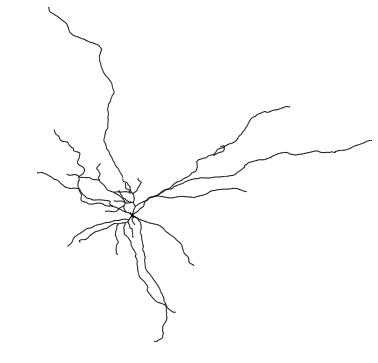

In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
location = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/"
List = McNeuron.get_all_path(location)
len(List)
n = McNeuron.Neuron(file_format = 'swc',input_file = List[1])
McNeuron.visualize.plot_2D(n,size = 10)

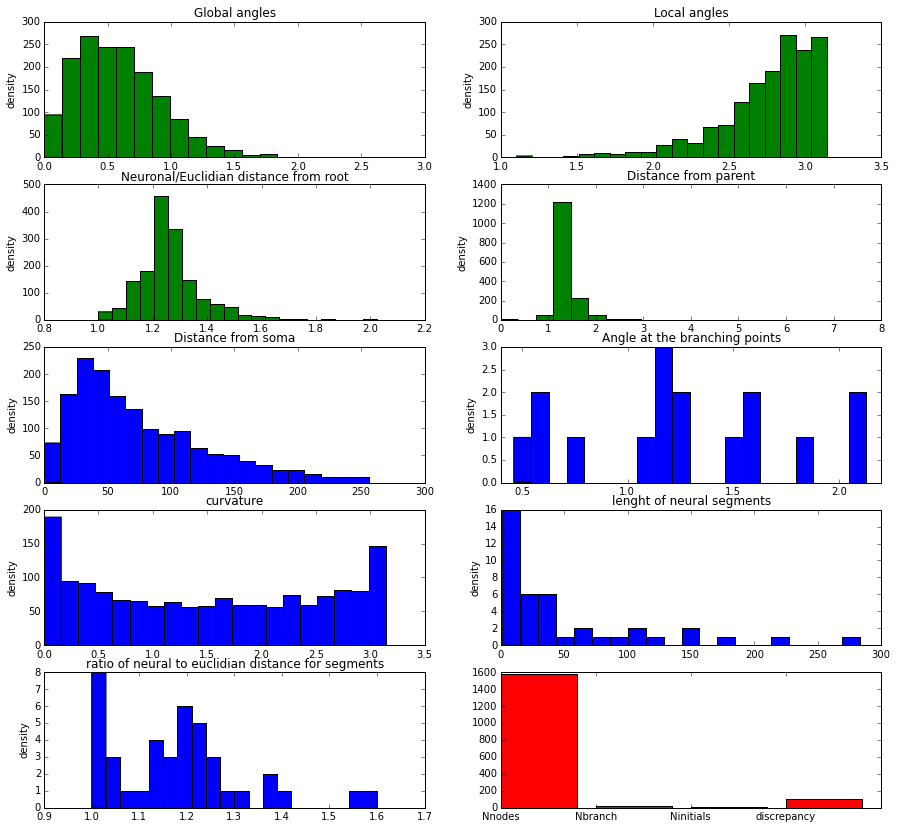

In [2]:
n.show_features()

In [12]:
a = ~ np.isnan(n.branch_angle[0,:])
n.branch_angle[0,a]

array([ 1.24253377,  1.27160051,  1.07397568,  1.57810309,  0.59708989,
        0.59048279,  1.19191036,  0.46170539,  1.54762948,  1.16890287,
        1.46508507,  2.09887937,  2.12910481,  0.74310247,  1.20329862,
        1.85476442])

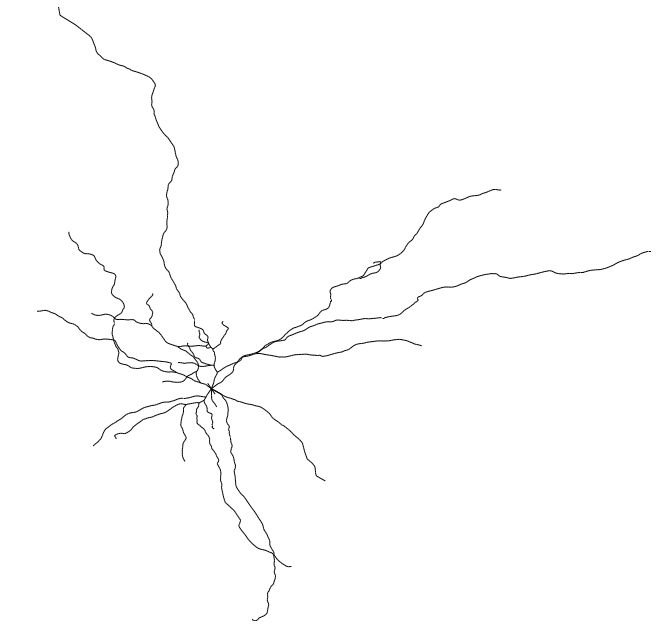

In [14]:
McNeuron.visualize.plot_2D(n,size = 10)

In [28]:
l = np.zeros(29)
for i in range(20):
    n = McNeuron.Neuron(file_format = 'swc',input_file = List[i])
#McNeuron.visualize.plot_2D(n,size = 13)
    l += np.histogram(n.features['branch_angle_segment'], bins = np.arange(0, np.pi,np.pi/30))[0]

(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)
(29,)


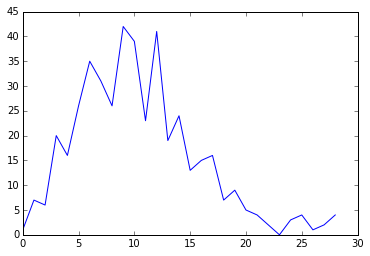

In [29]:
plt.plot(l)

In [43]:
from matplotlib import collections  as mc
def plot_dendograph(self):
    lines = []
    (branch_index,)  = np.where(self.branch_order==2)
    (end_nodes,)  = np.where(self.branch_order==0)
    important_node = np.append(branch_index,end_nodes)
    parent_important = self.parent_index_for_node_subset(important_node)
    important_node = np.append(0, important_node)
    print important_node
    print parent_important
    L = []
    for i in parent_important:
        (j,) = np.where(important_node==i)
        L = np.append(L,j)
    print L
    remain = [0]
    P = np.zeros(2,len(L))
    P[1,0] = .5
    (initial,) = np.where(L == 0)
    for i in initial:
        P[0,i] = 1
        P[1,i] = 1/(len(initial)+1)
        remain.append(i)
    while(len(remain) != len(L)):
# should look at the matlab code       
    

In [44]:
plot_dendograph(n)

[   0   10   77   83  101  433  440  705  714  740 1014 1120 1260 1292 1446
    1    2   72  203  211  315  421  590  615  684  698  825  889  978 1003
 1011 1151 1169 1261 1275 1334 1442 1465 1477]
[   0   10   77   83    0  433    0  705  714    0 1014 1014    0    0    0
    0   10  101  101   83   77  440  440  433    0  740  740  714  705    0
 1120 1120 1260 1260 1292 1292 1446 1446]
[  0.   1.   2.   3.   0.   5.   0.   7.   8.   0.  10.  10.   0.   0.   0.
   0.   1.   4.   4.   3.   2.   6.   6.   5.   0.   9.   9.   8.   7.   0.
  11.  11.  12.  12.  13.  13.  14.  14.]


(array([ 2.,  2.,  3.,  3.,  1.,  4.,  0.,  2.,  0.,  3.]),
 array([ 0.13449863,  0.36210999,  0.58972136,  0.81733272,  1.04494409,
         1.27255545,  1.50016681,  1.72777818,  1.95538954,  2.18300091,
         2.41061227]),
 <a list of 10 Patch objects>)

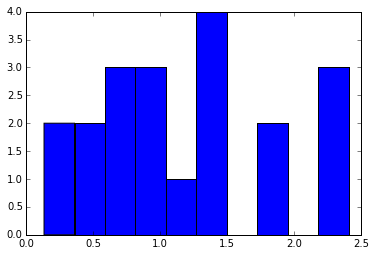

In [21]:
plt.hist(n.features['branch_angle'])

In [ ]:
import sys
import numpy as np
from numpy import mean, cov, dot, transpose
from numpy import linalg as LA
import math
from scipy.sparse import csr_matrix
from __builtin__ import str
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy.linalg import inv


In [ ]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
#np.random.seed(0)
loc2 = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/Pvalb-IRES-Cre-Ai14-475124495.CNG.swc"
loc3 = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/Scnn1a-Tg2-Cre-Ai14-475464642.CNG.swc"
loc4 = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/Pvalb-IRES-Cre-Ai14-396782215.CNG.swc"
Inter2 = McNeuron.Neuron(file_format = 'swc', input_file=loc2)
Inter3 = McNeuron.Neuron(file_format = 'swc', input_file=loc3)
Inter4 = McNeuron.Neuron(file_format = 'swc', input_file=loc4)
inter2 = Inter2.subsample_given_n_node(400)
inter3 = Inter3.subsample_given_n_node(400)
inter4 = Inter4.subsample_given_n_node(400)
#inter = Inter.subsample(10.)
#per = btmorph3.MCMC(iterations = 5000,verbose=0); per.set_n_node(250)
per = McNeuron.MCMC(neuron=deepcopy(inter4), iterations = 70,verbose=0)# per.set_n_node(len(inter.nodes_list))
#per = btmorph3.MCMC(neuron = inter,iterations = 2000,verbose=0)
#loc1 = "/Volumes/Arch/Projects/Computational Anatomy/neuron_nmo/poorthuis/CNG version/060110-LII-III.CNG.swc"
#loc1 = "../Generative-Models-of-Neuron-Morphology/Data/Pyramidal/poorthuis/CNG version/060110-LV.CNG.swc"
M = {'mean': {'Nbranch': 10,
 'branch_angle': .3,
# 'Nendpoint': 10,
 # 'Nnodes': 2000,
  #'diameter': 1,
#  'distance_from_root2': 0,
'distance_from_root': 20,
 'global_angle': .1,
  'distance_from_parent': 1.2,
  'local_angle':  3,
  'initial_segments': 4,
 # 'slope': .1,
'discrepancy_space': 60,
              'curvature' : .5,
 'ratio_euclidian_neuronal': 1        
             },
'variance': {
'Nbranch': 1,
  'branch_angle': .1,
 # 'Nnodes': 30,
  #'diameter': 1,
 # 'distance_from_root2': .2,
   'distance_from_root': 3,
  'global_angle': .1,
  'distance_from_parent': .1,
 'local_angle': .1, 
  'initial_segments': 1,
        'curvature' : .1,
  #'slope': .1,
'discrepancy_space': 5,
  'ratio_euclidian_neuronal': .01
             },
    'hist_range': {'Nbranch': np.array([1]),
 'branch_angle': np.arange(0,np.pi,np.pi/10),
# 'Nendpoint': 10,
 # 'Nnodes': 2000,
  #'diameter': 1,
#  'distance_from_root2': 0,
'distance_from_root': np.append(np.arange(1,200,3),500),
 'global_angle': np.arange(0,np.pi,np.pi/20),
  'distance_from_parent': np.append(np.arange(.5,1.5,.1),10),
  'local_angle': np.arange(0,np.pi,np.pi/20),
  'initial_segments': np.array([1]),
 # 'slope': .1,
'discrepancy_space': np.array([1]),
#              'curvature' : np.arange(0,np.pi,np.pi/20),
 'ratio_euclidian_neuronal': np.append(np.arange(1,1.5,.03),6)
              
             },
    'hist_variance': {'Nbranch': 1,
 'branch_angle': 1,
# 'Nendpoint': 10,
 # 'Nnodes': 2000,
  #'diameter': 1,
#  'distance_from_root2': 0,
'distance_from_root': 1,
 'global_angle': 1,
  'distance_from_parent': 1,
  'local_angle': .5,
  'initial_segments': 1,
 # 'slope': .1,
'discrepancy_space': 2,
           #   'curvature' : 1,
 'ratio_euclidian_neuronal': 1
              
             }
    }
per.kappa_rotation = 40.
per.set_ratio_red_to_ext(.1)
#per.set_measure(M)
per.set_real_neuron(inter3,M)

per.set_probability(np.array([0,0,.1,0,0,0,0,0,.2,.2,.1,.1,0,.1]))
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2d(gen,show_depth=False);

## Pyramidal neuron

In [ ]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
#np.random.seed(0)
L_neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/pyramidal")
#L_neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/badea, ganglia cell, retina mouse/")
Feature_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[1500])
#inter2 = Inter2.subsample_given_n_node(400)
feature_neuron = Feature_neuron.subsample_given_n_node(600)

Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[1020])
#Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file = L_neuron[1503])
Start_neuron.location *= 9
Start_neuron.set_nodes_values()
Start_neuron = McNeuron.Neuron(file_format = 'only list of nodes', input_file = deepcopy(Start_neuron.nodes_list))
start_neuron = Start_neuron.subsample_given_n_node(600)

# Plotting the neurons

In [ ]:
McNeuron.visualize.plot_2D(start_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
start_neuron.show_features(15,17,50)
McNeuron.visualize.plot_2D(feature_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
feature_neuron.show_features(15,17,50)

In [ ]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
per = McNeuron.MCMC( iterations = 1,verbose=0)
a = per.initial_neuron(10,20)
McNeuron.visualize.plot_2D(a)

In [ ]:

a.show_features(15,17,50)

# MCMC with start_neuron as the initial and feature_neuron as the features

In [ ]:
Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file = L_neuron[1021])
Start_neuron.location *= 1
Start_neuron.set_nodes_values()
Start_neuron = McNeuron.Neuron(file_format = 'only list of nodes', input_file = deepcopy(Start_neuron.nodes_list))
start_neuron = Start_neuron.subsample_given_n_node(600)

In [ ]:
per = McNeuron.MCMC(neuron=deepcopy(start_neuron), iterations = 10000,verbose=0)
#per = McNeuron.MCMC( iterations = 100,verbose=1, n_node = 200, initial_seg=1)
#per = McNeuron.MCMC(neuron=per.neuron, iterations = 5000,verbose=0)
#np.random.seed(0)
M = {'hist_range': {
    'Nbranch': np.array([1]),
    'branch_angle': np.arange(0,np.pi,np.pi/30),
    'distance_from_root': np.append(np.arange(1,1500,1),2000),
    'global_angle': np.arange(0,np.pi,np.pi/30),
    'distance_from_parent': np.append(np.arange(0,300,1),500),
    'local_angle': np.arange(0,np.pi,np.pi/30),
    'initial_segments': np.array([1]),
    'discrepancy_space': np.array([1]),
    'curvature' : np.arange(0,np.pi,np.pi/30),
    'ratio_euclidian_neuronal': np.append(np.arange(1,3,.01),np.arange(3,40,3)),
    'neural_important' : np.arange(0,600,10),
    'ratio_neural_euclidian_important' : np.arange(1,3,.01)
    },
    'hist_variance': {
    'Nbranch': 1,
    'branch_angle': .3,
    'distance_from_root': .3,
    'global_angle': 1,
    'distance_from_parent': .5,
    'local_angle': .6,
    'initial_segments': .5,
    'discrepancy_space': 10,
    'curvature' : 2,
    'ratio_euclidian_neuronal': .5 ,
   'neural_important' : .3,
    'ratio_neural_euclidian_important' : .5      
    }}
#M = {'hist_range': {'distance_from_root': np.append(np.arange(1,1500,1),2000),},
#     'hist_variance': {'distance_from_root': .01,}}
L = {
     'extension/reduction': 0.,
     'extension/reduction end points': 0.,
     'add/remove' : 0.,
     'rescale toward end' : 0,
     'diameter' : 0.,
     'diameter_toward' : 0. ,
     'rotation for any node' : 0.02,
     'rotation for branching' : 0.3,
     'location toward end' : 0,
     'location' : 0,
     'location for important point' : .5,
     'sliding general' : 0,
     'sliding certain in distance' : .1,
     'sliding for branching node' : 0,
     'sliding for branching node certain distance' : .2,
     'stretching vertical' : .2,
     'stretching horizental' : .2}
# L = {'sliding certain in distance' : .3,
#     'location for important point' : .5}
per.kappa_rotation = 400.
per.set_ratio_red_to_ext(.1)
per.rescale_value = 0
per.sliding_limit = 650.
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_real_neuron(feature_neuron,M)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=2,size = 6);
per.show_MCMC(0,14,6)
per.neuron.show_features(15,17,20)
# print sum(per.trend[:,-1:])
# per.set_verbose(1)
# per.set_initial_neuron(deepcopy(per.neuron))
# per.set_real_neuron(feature_neuron,M)
# per.set_probability(L)
# per.ite = 1
# per.fit()

In [ ]:
#McNeuron.visualize.plot_2D(start_neuron, dpi = 120, size = 5, show_width= False,  background = .01,line_width=2)
size = 1
McNeuron.visualize.plot_2D(start_neuron, dpi = 200, size = size, show_width= False,  background = .01,line_width=1)
McNeuron.visualize.plot_2D(per.neuron, dpi = 200, size = size, show_width= False,  background = .01,line_width=1)
McNeuron.visualize.plot_2D(feature_neuron, dpi = 200, size = size, show_width= False,  background = .01,line_width=1)

In [ ]:
#plt.plot(sum(per.trend[:,1:],0))
plt.plot(np.transpose(per.trend[[1,2,3,4,5,6,7,9,10,11],1:]));
plt.legend(per.list_features,bbox_to_anchor=(2.1,1.1))
#plt.savefig("/Volumes/Arch/Dropbox/MCMC paper/convergence2.eps")

In [ ]:
np.append(n)

In [ ]:
per.trend[:,9000]

# Start from the current neuron

In [ ]:
per1 = McNeuron.MCMC(neuron=deepcopy(per.neuron), iterations = 1,verbose=1)
#per1.set_measure(M)
per1.set_real_neuron(inter3,M)
#per1.set_n_node(60)
#per1.set_probability(np.array([0,0,.2,0,.2,0,0,0,.2,.2,.2,0,0]))
per1.set_probability(np.array([0,0,.1,0,0,0,0,0,.2,.25,.05,.1,.1]))
per1.fit()
gen1 = per1.neuron
McNeuron.visualize.plot_2D(gen1,show_radius=False);

In [ ]:
per1.neuron.show_features(15,17,20)

In [ ]:
McNeuron.visualize.plot_2D(inter,show_radius=False)

In [ ]:
per1.list_features

In [ ]:
L_neuron = McNeuron.visualize.get_all_path("/Volumes/Arch/Projects/Computational Anatomy/badea, ganglia cell, retina mouse/")
Start_neuron = McNeuron.Neuron(file_format = 'swc', input_file=L_neuron[6])


In [ ]:
McNeuron.visualize.plot_2D(Start_neuron)

In [ ]:
Start_neuron.show_features(15,17,50)

# Starting from a real neuron

In [ ]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline
#loc2 = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/Pvalb-IRES-Cre-Ai14-475124495.CNG.swc"
loc2 = "../Generative-Models-of-Neuron-Morphology/Data/Interneuron/allen cell types/CNG version/Pvalb-IRES-Cre-Ai14-475465561.CNG.swc"
inter = McNeuron.Neuron(file_format = 'swc', input_file=loc2)
per = McNeuron.MCMC(neuron= inter, iterations=20,verbose = 0)
#per = btmorph3.MCMC(neuron= per.neuron, iterations= 30,verbose = 0)
M = {'mean': {'Nbranch': 35,
 # 'Nendpoint': 10,
 # 'Nnodes': 2400,
  'branch_angle': 2.4,
  #'diameter': 1,
  'distance_from_root': 60,
  'global_angle': .5,
  'length_to_parent': 1,
  'local_angle': 2.7,
  'initial_segments': 11,
  #'slope': .1,
  'ratio_euclidian_neuronal': 1.1},
 'variance': {'Nbranch': 5,
  'Nendpoint': 10,
  'Nnodes': 10,
  'branch_angle': .2,
  #'diameter': 1,
  'distance_from_root': 10,
  'global_angle': .100,
  'length_to_parent': .1,
  'local_angle': .2,
  'initial_segments': 1,
  #'slope': .1,
  'ratio_euclidian_neuronal': .1}}
#per.set_n_node(inter.n_node)
per.set_measure(M)
L = {'extension/reduction': 0.,
     'extension/reduction end points': 0.,
     'sliding' : .1,
     'add/remove' : 0,
     'location' : .05,
     'diameter' : 0.,
     'diameter_toward' : 0. ,
     'rotation for any node' : 0,
     'rotation for branching' : .2,
     'sliding general' : .25,
     'location toward end' : .05,
     'rescale toward end' : 0,
     'Sliding certain in distance' : .2,
     'sliding for branching node' : .2,
     'Stretching vertical' : .2,
     'Stretching horizental' : .2}
per.set_probability(L)
per.fit()
gen = per.neuron
gen.set_nodes_values()
McNeuron.visualize.plot_2D(gen,show_radius = False)